## How to using Qsqlite on notebook

In [1]:
# 1. import Qexec
from Qsqlite import Qexec

# 2. write your database script 
script = ' select date("now") '

# 3 .execute it
Qexec(script)

-1 2022-03-13
------ Total: 1 ------ 


In [2]:

# Add multiple scripts at once

script = '''

  # open database and load data from csv
  open :memory:

  # load covid19 US & Japan data 
  loadcsv covid19_us_jp.csv covid 1

  # show table struct
  info
  echo ## list random 3 rows ##
  select * from covid order by random() limit 3

  # show report 
  # confirmed + 0 let text convert to int, or using cast(confirmed as decimal)
  echo ## data info ##
  select ID, max(date), max(confirmed + 0), max(deaths + 0) from covid group by ID >[- _@1_, until _@2_ , Total confirmed: _@3_, Total deaths: _@4_]

'''

# execute it
Qexec(script)


Using Share Memory Database.
CSV Title:  ['ID', 'date', 'confirmed', 'deaths', 'd_confirmed', 'd_deaths']
Load csv 1540 Records to table covid
# 1 [covid] 
 CREATE TABLE covid (ID text,date text,confirmed text,deaths text,d_confirmed text,d_deaths text)
## list random 3 rows ##
-1 US 2021-05-25 33279976 590189 24526 648
-2 JP 2021-01-10 289144 4067 6108 45
-3 US 2021-11-14 47113024 764374 31210 190
------ Total: 3 ------ 
## data info ##
- JP, until 2022-03-01 , Total confirmed: 5071249, Total deaths: 23905
- US, until 2022-03-01 , Total confirmed: 79091361, Total deaths: 952423


## US day confirmed(blue) and total death(green)


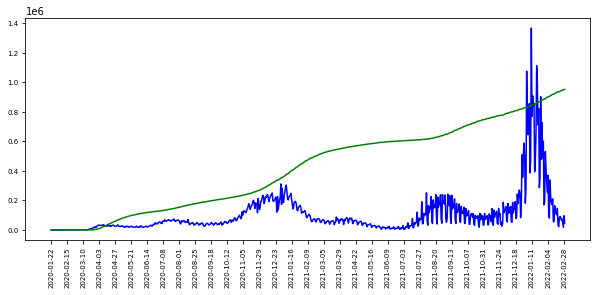

## JP day confirmed(blue) and total death(green)


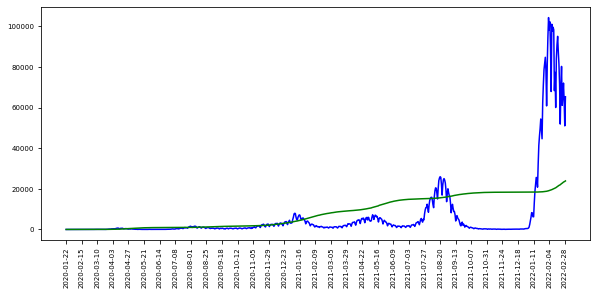

## JP day confirmed                 total death


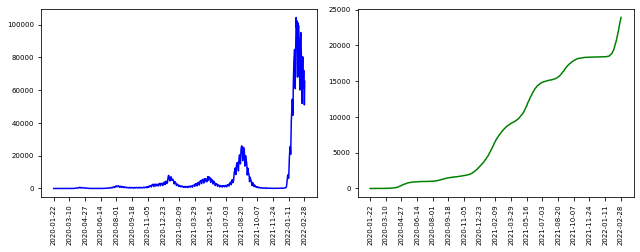

## US(blue) VS Japan(green) log Weekly Averages day confirmed


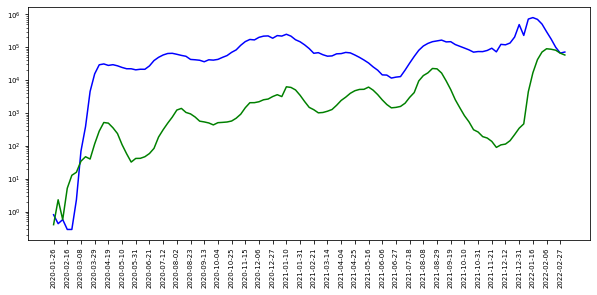

In [12]:

script = '''

  echo ## US day confirmed(blue) and total death(green)
  draw l select date, d_confirmed, deaths from covid where ID='US' order by date
  
  echo ## JP day confirmed(blue) and total death(green)
  draw l select date, d_confirmed, deaths from covid where ID='JP' order by date

  echo ## JP day confirmed                 total death
  draw ls select date, d_confirmed, deaths from covid where ID='JP' order by date

  echo ## US(blue) VS Japan(green) log Weekly Averages day confirmed
  draw ly select w.date, w.d_confirmed, m.d_confirmed from ( select max(date) as date, avg(d_confirmed) as d_confirmed from covid where ID='US' group by strftime('%Y-%W',date) ) as w left join ( select max(date) as date, avg(d_confirmed) as d_confirmed from covid where ID='JP' group by strftime('%Y-%W',date) ) as m on w.date = m.date

'''

Qexec(script)

CSV Title:  ['ID', 'name', 'lon', 'lat']
Load csv 3198 Records to table c
CSV Title:  ['ID', 'name', 'cname', 'population', 'lon', 'lat']
Load csv 330 Records to table c2
## Chinese Maps


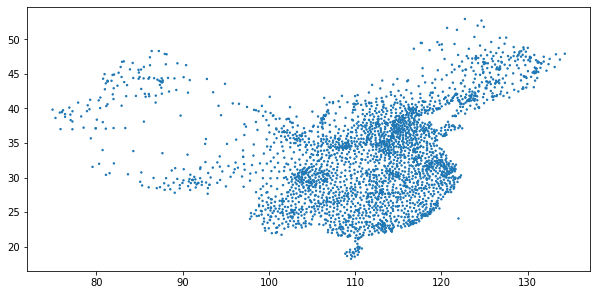

## Chinese City Maps ( red for citys, scale by population; blue for county)


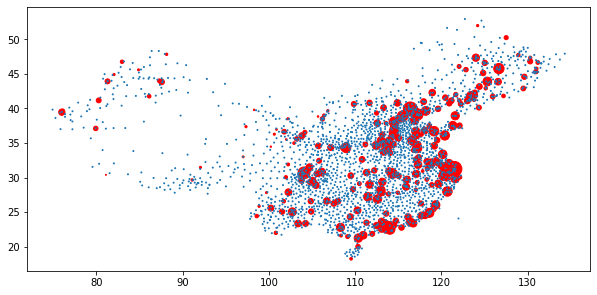

In [4]:
script = '''

# load china citys data from csv file
loadcsv cn_city_l3_xy.csv c 1
loadcsv cn_city_l2_xyp.csv c2 1

echo ## Chinese Maps 
draw s select lon, lat, 2 from c

# using two tables data, draw combind maps
echo ## Chinese City Maps ( red for citys, scale by population; blue for county)
draw s select lon, lat, ifnull(n,1) n, case when n is null then '#1f77b4' else 'red' end from c left outer join (select id||substr('0000',1,6-length(id)) as id, population/10 as n from c2) as p on c.id = p.id

'''

Qexec(script)

## Chinese citys population


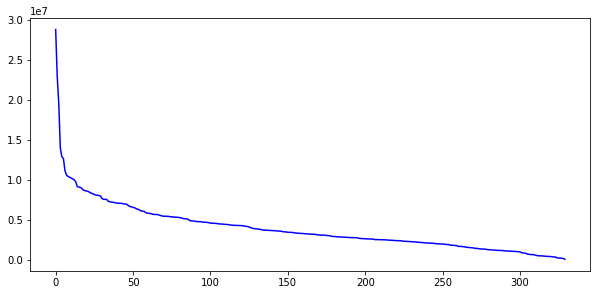

## Chinese citys population histogram      (dobule logs)


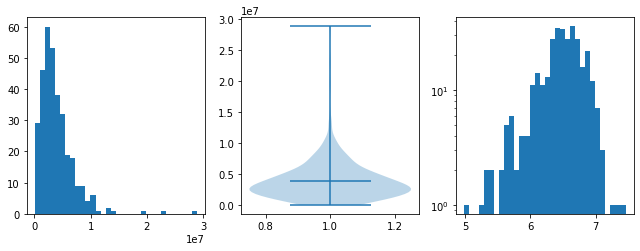

In [20]:
script = '''

  # draw citys population line
  echo ## Chinese citys population
  draw l select population*10000 from c2 order by population*10000 desc

  # draw citys population histogram
  echo ## Chinese citys population histogram      (dobule logs)
  draw h select population * 10000.0 from c2; draw v select population * 10000.0 from c2; draw hl select population * 10000.0 from c2

'''

Qexec(script)